<a href="https://colab.research.google.com/github/rahul-premanand/Hello-World/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
count    197218.000000
mean         31.704870
std          17.144043
min          -4.000000
25%          19.000000
50%          31.000000
75%          43.000000
max         144.000000
Name: AirNOW_O3, dtype: float64
Mean: 31.704869738056363
Median: 31.0
Standard Deviation: 17.144042888414546
Range: 148.0


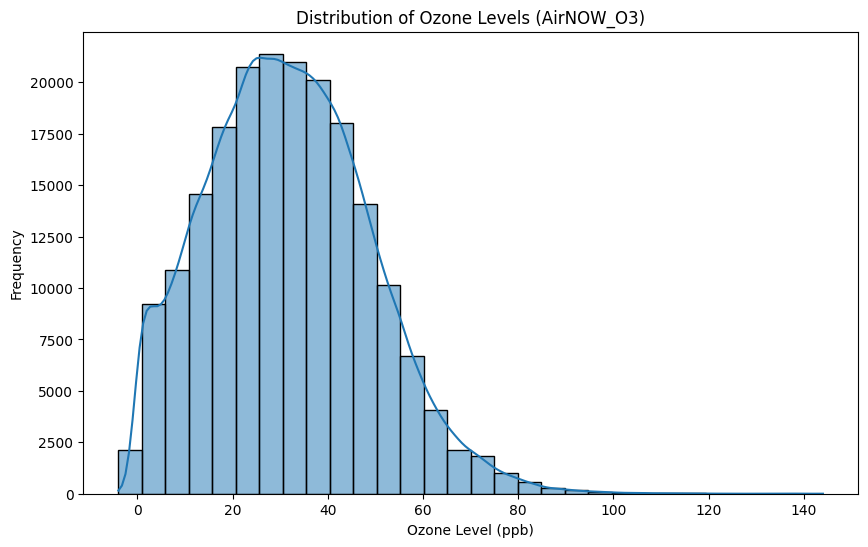

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import numpy as np

drive.mount('/content/drive')

# Load the data
df = pd.read_csv('dataset/training_one_year.csv')

# Summary statistics
summary_stats = df['AirNOW_O3'].describe()
print(summary_stats)

# Additional statistics
mean = df['AirNOW_O3'].mean()
median = df['AirNOW_O3'].median()
std_dev = df['AirNOW_O3'].std()
range_val = df['AirNOW_O3'].max() - df['AirNOW_O3'].min()

print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Standard Deviation: {std_dev}')
print(f'Range: {range_val}')

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['AirNOW_O3'], bins=30, kde=True)
plt.title('Distribution of Ozone Levels (AirNOW_O3)')
plt.xlabel('Ozone Level (ppb)')
plt.ylabel('Frequency')
plt.show()


# Geospatial analysis


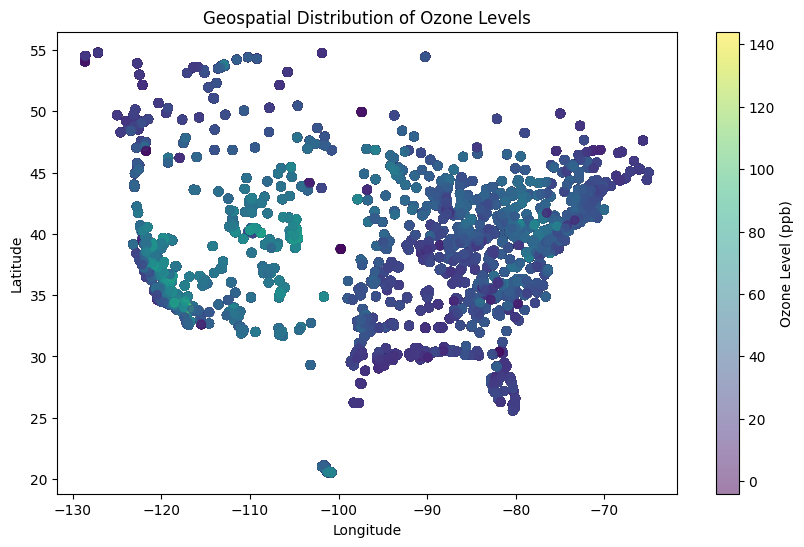

In [20]:
# Scatter plot of ozone levels by location
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude_x'], df['Latitude_x'], c=df['AirNOW_O3'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Ozone Level (ppb)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Ozone Levels')
plt.show()


## Regional Comparison


<ipython-input-21-1b4ddb2c47b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_means, x='StationID', y='AirNOW_O3', palette='viridis')


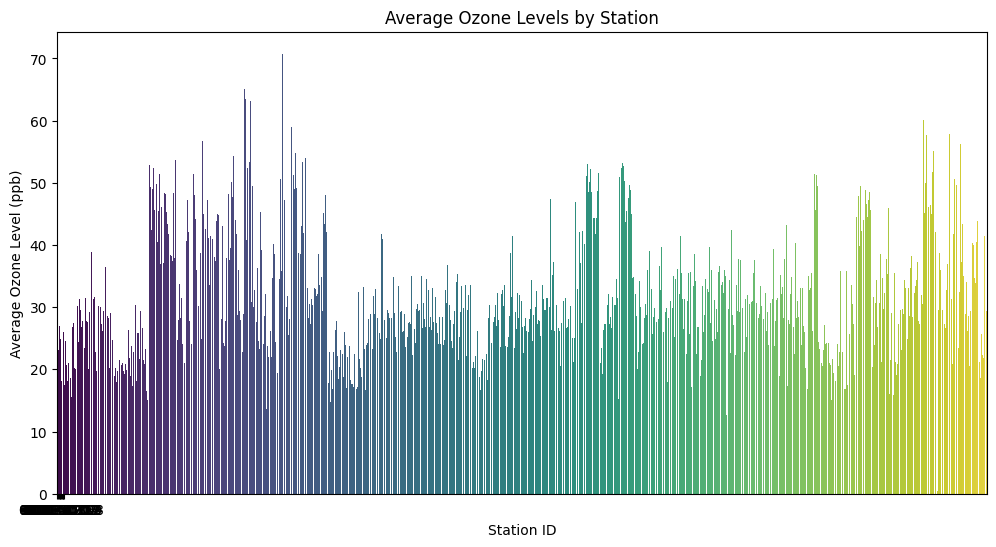

In [21]:
# Assuming 'StationID' or a similar column exists to differentiate regions or stations
# Group by station and calculate the mean ozone levels
regional_means = df.groupby('StationID')['AirNOW_O3'].mean().reset_index()

# Plot regional comparisons
plt.figure(figsize=(12, 6))
sns.barplot(data=regional_means, x='StationID', y='AirNOW_O3', palette='viridis')
plt.title('Average Ozone Levels by Station')
plt.xlabel('Station ID')
plt.ylabel('Average Ozone Level (ppb)')
#plt.xticks(rotation=90)
plt.xticks(np.linspace(0, 10, 10))

plt.show()
